[ 예제 ] [직장인을 위한 데이터분석 실무 파이썬](https://wikibook.co.kr/pwdrev/)



## 3.2.1 유튜브 랭킹 데이터 수집하기

In [2]:
#!pip install selenium
#!pip install bs4
#!pip install pandas

In [5]:
# 예제 3-38 라이브러리 추가하기
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [6]:
# 예제 3-39 webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('D:/MyClass/Python/eAnalysis/11_AnalysisExam/webdriver/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
browser.get(url)

C:\Users\tjdgh\AppData\Local\Temp\ipykernel_60880\976934821.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('D:/MyClass/Python/eAnalysis/11_AnalysisExam/webdriver/chromedriver.exe')


In [7]:
# 예제 3-40 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# 예제 3-41 BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [11]:
# 예제 3-42 tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [12]:
# 예제3-43채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [13]:
# 예제 3-44 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [14]:
# 예제 3-45 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [15]:
# 예제 3-46 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

8870만
313억7380만
524개


In [16]:
# 예제 3-47 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    
    if not channel.select('h1 > a'): continue
    
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 8870만 313억7380만 524개
BANGTANTV [음악/댄스/가수] 7490만 204억2338만 2,209개
HYBE LABELS [음악/댄스/가수] 7080만 279억9246만 1,244개
SMTOWN [음악/댄스/가수] 3170만 270억5303만 4,128개
JYP Entertainment [음악/댄스/가수] 2700만 195억1942만 1,697개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2600만 78억2516만 5,483개
1theK (원더케이) [음악/댄스/가수] 2450만 238억0441만 18,263개
Alan Becker [미분류] 2220만 51억8245만 155개
Mnet K-POP [음악/댄스/가수] 2050만 148억1414만 32,338개
KBS WORLD TV [TV/방송] 1890만 149억7884만 63,464개
officialpsy [음악/댄스/가수] 1810만 106억0515만 130개
Jane ASMR 제인 [음식/요리/레시피] 1770만 73억0785만 2,153개
JFlaMusic [음악/댄스/가수] 1760만 37억9283만 319개
TWICE [음악/댄스/가수] 1590만 49억2418만 1,097개
Hongyu ASMR 홍유 [음식/요리/레시피] 1500만 50억1196만 641개
BIGBANG [음악/댄스/가수] 1500만 77억8565만 776개
Boram Tube ToysReview [보람튜브 토이리뷰] [키즈/어린이] 1460만 50억0911만 610개
서은일상이야기 [키즈/어린이] 1410만 22억4363만 425개
BIBO와 장난감 [키즈/어린이] 1290만 31억7154만 186개
Stray Kids [음악/댄스/가수] 1270만 30억6847만 777개
GH'S [미분류] 1130만 70억6080만 421개
[햄지]Hamzy [음식/요리

In [21]:
# 예제 3-48 페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [22]:
# 예제 3-49 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(5)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

In [23]:
# 예제 3-50 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index = False)

## 3.2.2 유튜브 랭킹 데이터 시각화하기

In [37]:
# 예제 3-51 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# 예제 3-52 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [24]:
# 예제 3-53 엑셀 파일 불러오기
df = pd.read_excel('./files/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],8870만,313억7380만,524개
1,BANGTANTV,[음악/댄스/가수],7490만,204억2338만,"2,209개"
2,HYBE LABELS,[음악/댄스/가수],7080만,279억9246만,"1,244개"
3,SMTOWN,[음악/댄스/가수],3170만,270억5303만,"4,128개"
4,JYP Entertainment,[음악/댄스/가수],2700만,195억1942만,"1,697개"


In [25]:
# 예제 3-54 데이터 살펴보기
df.tail()

,title,category,subscriber,view,video
995,핫소스,[미분류],74만,3억0353만,251개
996,[에일리 OFFICIAL] aileemusic,[미분류],74만,1억8967만,196개
997,프랭키 키즈 TV LET'S PLAY FRANKY !,[키즈/어린이],74만,3억6829만,292개
998,Conversational Korean,[교육/강의],74만,3248만,398개
999,원지의하루,[국내/해외/여행],74만,1억4131만,374개


In [26]:
# 예제 3-55 데이터 살펴보기
df['subscriber'][0:10]

0    8870만
1    7490만
2    7080만
3    3170만
4    2700만
5    2650만
6    2600만
7    2450만
8    2220만
9    2050만
Name: subscriber, dtype: object

In [27]:
# 예제 3-56 데이터 살펴보기
df['subscriber'].str.replace('만', '0000')[0:10]

0    88700000
1    74900000
2    70800000
3    31700000
4    27000000
5    26500000
6    26000000
7    24500000
8    22200000
9    20500000
Name: subscriber, dtype: object

In [28]:
# 예제 3-57 replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],8870만,313억7380만,524개,88700000
1,BANGTANTV,[음악/댄스/가수],7490만,204억2338만,"2,209개",74900000
2,HYBE LABELS,[음악/댄스/가수],7080만,279억9246만,"1,244개",70800000
3,SMTOWN,[음악/댄스/가수],3170만,270억5303만,"4,128개",31700000
4,JYP Entertainment,[음악/댄스/가수],2700만,195억1942만,"1,697개",27000000


In [29]:
# 예제 3-58 데이터 상세 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [30]:
# 예제 3-59 Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [31]:
# 예제 3-60 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],101260000,59
[IT/기술/컴퓨터],9930000,7
[TV/방송],267950000,122
[게임],67950000,51
[교육/강의],29070000,21


In [32]:
# 예제 3-61 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],101260000,59
[IT/기술/컴퓨터],9930000,7
[TV/방송],267950000,122
[게임],67950000,51
[교육/강의],29070000,21


In [33]:
# 예제3-62 데이터프레임의인덱스초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],101260000,59
1,[IT/기술/컴퓨터],9930000,7
2,[TV/방송],267950000,122
3,[게임],67950000,51
4,[교육/강의],29070000,21


In [34]:
# 예제3-63 데이터프레임을내림차순정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],822200000,152
16,[키즈/어린이],403790000,131
7,[미분류],301080000,192
2,[TV/방송],267950000,122
11,[음식/요리/레시피],216550000,71


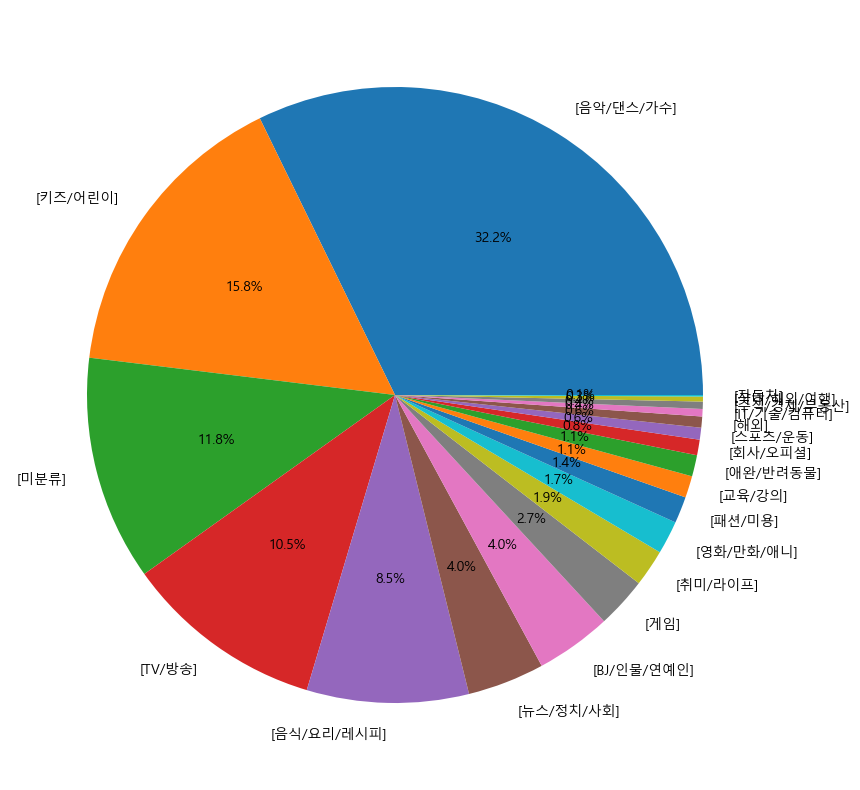

In [39]:
# 예제3-64 카테고리별구독자수시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

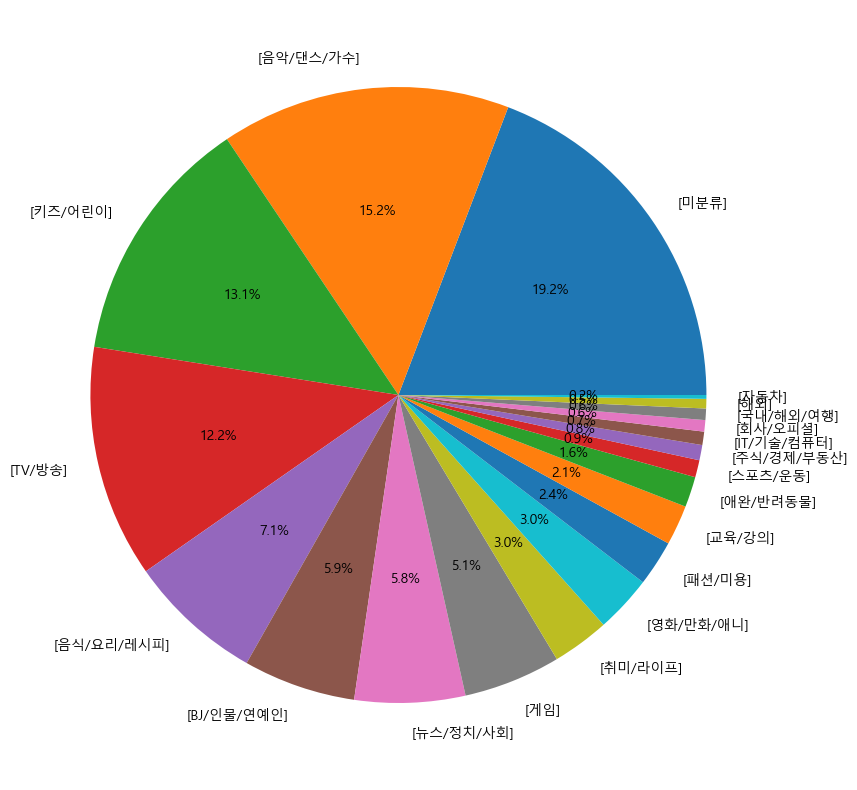

In [40]:
# 예제 3-65 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()